In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:
mean1 = 4
mean2 = 3.8
mean3 = 2

N1 = 30
N2 = 35
N3 = 29

stdev = 2

In [27]:
data1 = np.random.normal(mean1, stdev, N1)
data2 = np.random.normal(mean2, stdev, N2)
data3 = np.random.normal(mean3, stdev, N3)

In [28]:
from scipy.stats import f_oneway

F, p = f_oneway(data1, data2, data3)

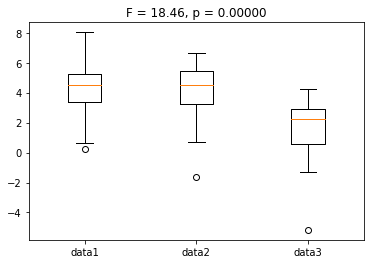

In [33]:
# create box plot
plt.boxplot([data1, data2, data3], labels=['data1', 'data2', 'data3'])
plt.title(f"F = {F:.2f}, p = {p:.5f}")
plt.show()

In [34]:
# tukey pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=np.concatenate([data1, data2, data3]), groups=np.concatenate([['data1']*N1, ['data2']*N2, ['data3']*N3]), alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 data1  data2  -0.0801 0.9834 -1.1762   1.016  False
 data1  data3  -2.5509    0.0 -3.6981 -1.4037   True
 data2  data3  -2.4708    0.0  -3.577 -1.3646   True
----------------------------------------------------


<ipython-input-13-73c0c2fc2e87>:5: RuntimeWarning: divide by zero encountered in true_divide
  return 0.5 * np.log((1 + r) / (1 - r))
<ipython-input-13-73c0c2fc2e87>:5: RuntimeWarning: divide by zero encountered in log
  return 0.5 * np.log((1 + r) / (1 - r))


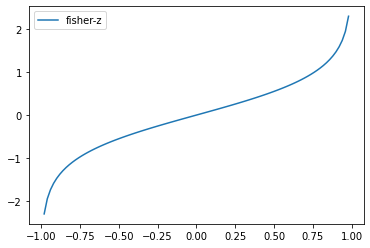

5.293304824724492


In [13]:
def t_value_pearson(r, n):
    return r * np.sqrt((n - 2) / (1 - r**2))

def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

x = np.linspace(-1, 1, 100)
# y = t_value_pearson(x, 10)
z = fisher_z(x)

# plt.plot(x, y, label='t-value')
plt.plot(x, z, label='fisher-z')
plt.legend()
plt.show()

(array([0.04106667, 0.07466667, 0.1204    , 0.1652    , 0.17453333,
        0.11946667, 0.09146667, 0.0616    , 0.0476    , 0.02146667,
        0.00746667, 0.00466667, 0.00186667, 0.00186667]),
 array([ 0.        ,  1.07142857,  2.14285714,  3.21428571,  4.28571429,
         5.35714286,  6.42857143,  7.5       ,  8.57142857,  9.64285714,
        10.71428571, 11.78571429, 12.85714286, 13.92857143, 15.        ]),
 <BarContainer object of 14 artists>)

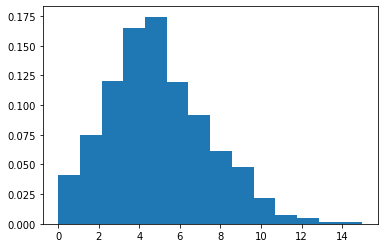

In [86]:
x = np.random.poisson(5, 1000)


plt.hist(x, bins=14, density=True)

In [87]:
x

array([ 2,  4,  4,  7,  3,  3,  3,  5,  3,  3,  2, 11,  4,  2,  5,  4,  3,
        6,  9, 10,  9,  4,  3,  3,  5,  3,  8,  8,  4,  1,  2,  4,  4,  8,
        4,  9,  4,  2,  4,  5,  5,  7,  5,  4,  1,  5,  3,  4,  6,  1,  4,
        5,  6,  5,  3,  4,  7,  4,  3,  2,  4,  5,  5,  7,  4,  2,  7,  5,
        3,  3,  2,  5,  7,  3,  8,  6,  9,  4,  2, 10,  5,  8,  1,  5,  6,
        3,  7,  5,  8,  5,  0,  2,  4,  2,  6,  7,  4,  3,  4,  3,  6,  9,
        7,  4,  6,  5,  4,  7,  8,  9,  5,  9,  4,  5,  6,  4,  1,  8,  4,
        7,  6,  5,  3,  7,  0,  5,  6,  6,  2,  5,  8,  5,  3,  6,  4,  9,
        2,  3,  8,  1,  2,  7,  9,  8,  5,  7,  6,  6,  6,  2,  3,  7,  5,
        3,  3,  4,  6,  5,  6,  2,  5,  4,  3,  5,  7,  4,  5,  7,  4,  6,
        3, 10,  4,  8,  3,  8,  1,  4,  5,  1,  5,  5,  6,  6,  7,  6,  7,
        4,  6,  4,  2,  6,  5,  8,  7,  3,  6,  6,  3,  4,  3,  3,  4,  1,
        2,  6,  5, 10,  5,  5,  3, 10,  5, 10, 10,  7,  5,  1,  5,  7,  5,
        3,  3,  1,  8,  9

In [71]:
mean1 = 1
mean2 = 1.2
num_exps = 100
pval_thresh = 0.05
sample_sizes = range(10, 1000)

t_mat = np.zeros((len(sample_sizes), num_exps))
t_thresh = np.zeros(len(sample_sizes))

for n in range(len(sample_sizes)):
    for i in range(num_exps):
        x = np.random.randn(sample_sizes[n]) + mean1
        y = np.random.randn(sample_sizes[n]) + mean2
        t, _ = stats.ttest_ind(x, y, equal_var=False)
        t_mat[n, i] = t

for n in range(len(sample_sizes)):
    t_thresh[n] = stats.t.ppf(1 - pval_thresh, 2 * sample_sizes[n] - 2)




In [ ]:

plt.plot(sample_sizes, t_mat, 'b', alpha=0.1)
plt.plot(sample_sizes, -t_thresh, 'r')
plt.plot(sample_sizes, np.mean(t_mat, axis=1), 'black')
plt.plot()

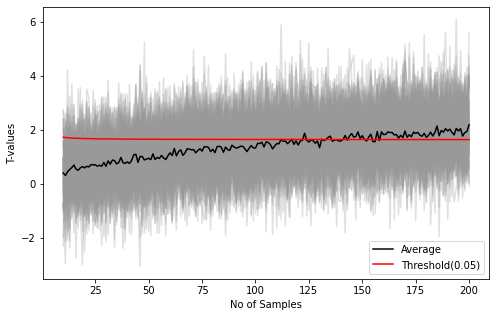

In [62]:
mean1 = 1
mean2 = 1.2
num_exp = 100
pval_thresh = .05
 
sample_size = np.arange(10,201)
t_matrix = np.zeros((len(sample_size),num_exp))
 
for exp in range(num_exp):
    for samp in range(len(sample_size)):
 
        data1 = np.random.randn(sample_size[samp]) + mean1
        data2 = np.random.randn(sample_size[samp]) + mean2
        
        t,_ = stats.ttest_ind(data2, data1, equal_var=False)
        t_matrix[samp,exp] = t
        
# Average t values
avg_t = np.mean(t_matrix, axis=1)
 
# t-values at threshold 0.05
t_thresh = np.zeros(len(sample_size))
for i in range(len(sample_size)):
    df = 2*sample_size[i] - 2
    t_thresh[i] = stats.t.ppf(1 - pval_thresh, df)
 
 
# Plotting the results
plt.subplots(figsize=(8,5))
plt.plot(sample_size, t_matrix, color=[0.6,0.6,0.6,0.3])
plt.plot(sample_size, avg_t, color="k", label="Average")
plt.plot(sample_size, t_thresh, color="r", label="Threshold(%g)"%pval_thresh)
plt.xlabel("No of Samples")
plt.ylabel("T-values")
plt.legend()

Text(0, 0.5, 'Data value')

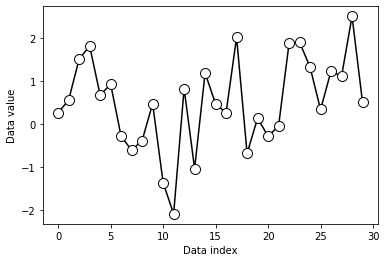

In [54]:
N = 30
popMu = .5
data = np.random.randn(N) + popMu

plt.plot(data, 'ko-', markerfacecolor='w', markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')

Text(0.5, 1.0, 't-value = 2.591, p-value = 0.015')

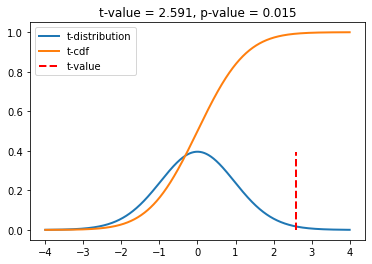

In [55]:
H0val = 0
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1) / np.sqrt(N)
t_val = t_num / t_den

df = N - 1
# calc p value
p_val = (1 -stats.t.cdf(abs(t_val), df=df)) * 2
x = np.linspace(-4, 4, 1001)
tdist = stats.t.pdf(x, df=df)
tcdf = stats.t.cdf(x, df=df)

plt.plot(x, tdist, linewidth=2)
plt.plot(x, tcdf, linewidth=2)
plt.plot([t_val, t_val], [0, max(tdist)], 'r--', linewidth=2)
plt.legend(['t-distribution', 't-cdf', 't-value'])
plt.title('t-value = %.3f, p-value = %.3f' % (t_val, p_val))

Text(0, 0.5, 'p-value')

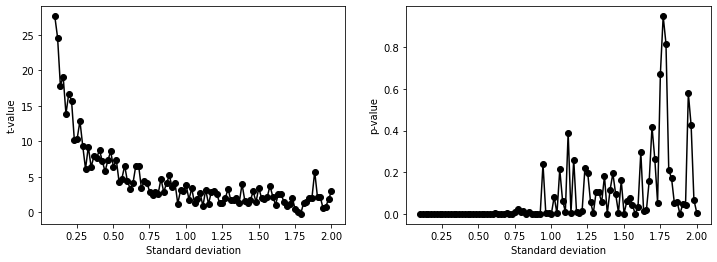

In [63]:
N = 30
popMu = .5
std = np.linspace(.1, 2, 100)

t_values = np.zeros(len(std))
p_values = np.zeros(len(std))

for i in range(len(std)):
    data = np.random.randn(N) * std[i] + popMu
    t, p = stats.ttest_1samp(data, H0val)
    t_values[i] = t
    p_values[i] = p


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(std, t_values, 'ko-')
ax[0].set_xlabel('Standard deviation')
ax[0].set_ylabel('t-value')

ax[1].plot(std, p_values, 'ko-')
ax[1].set_xlabel('Standard deviation')
ax[1].set_ylabel('p-value')

In [64]:
from scipy.stats import pearsonr

pearsonr(p_values, t_values)

PearsonRResult(statistic=-0.38087425128286984, pvalue=9.257478893470112e-05)

In [66]:
np.sqrt(2 * 4), np.sqrt(2) * 2

(2.8284271247461903, 2.8284271247461903)

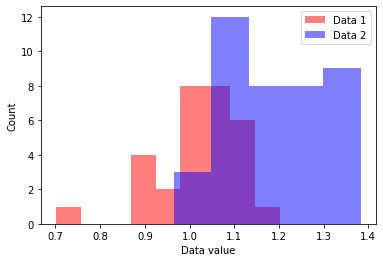

In [74]:
n1 = 30
n2 = 40
mu1 = 1
mu2 = 1.2

data1 = mu1 + np.random.randn(n1) / 10
data2 = mu2 + np.random.randn(n2) / 10

plt.hist(data1, bins='fd', color=[1,0,0,.5], label='Data 1')
plt.hist(data2, bins='fd', color=[0,0,1,.5], label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()

In [75]:
t, p = stats.ttest_ind(data1, data2, equal_var=True)
df = n1 + n2 - 2

print('t-value = %.3f, p-value = %.3f, df = %d' % (t, p, df))

t-value = -7.049, p-value = 0.000, df = 68
